# Introduction to Machine Learning
# with Python
### A Guide for Data Scientists
_Andreas C. Müller and Sarah Guido_


## Chapter 1


In [12]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split

In [29]:
# https://stackoverflow.com/questions/48367283/error-install-mglearn

!pip install mglearn

  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582645 sha256=bdafd6703b57b7cda1d596706b123944ce5d418d5dfaa46a73ede709cb6118a4
  Stored in directory: c:\users\drnesr\appdata\local\pip\cache\wheels\87\75\37\404e66d0c4bad150f101c9a0914b11a8eccc2681559936e7f7
Successfully built mglearn


In [30]:
import mglearn

In [2]:
iris_dataset = load_iris()

In [4]:
iris_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [8]:
for line in iris_dataset['DESCR'].split('\n'):
    print(line)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [9]:
iris_dataset['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [11]:
print("Feature names: \n{}".format(iris_dataset['feature_names']))

Feature names: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [13]:
iris_dataset['data'].shape, iris_dataset['target'].shape

((150, 4), (150,))

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

In [18]:
for x in [X_train, X_test, y_train, y_test]:
    print (x.shape)

(112, 4)
(38, 4)
(112,)
(38,)


In [16]:
x.shape for x in (X_train, X_test, y_train, y_test)

SyntaxError: invalid syntax (<ipython-input-16-b02195a16750>, line 1)

In [25]:
# label the columns using the strings in iris_dataset.feature_names
col_names = [
    x.split("(")[0].strip().replace(" ", "_")
    for x in iris_dataset.feature_names
]

In [26]:
# create dataframe from data in X_train

iris_dataframe = pd.DataFrame(X_train, columns=col_names)
iris_dataframe.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.9,3.0,4.2,1.5
1,5.8,2.6,4.0,1.2
2,6.8,3.0,5.5,2.1
3,4.7,3.2,1.3,0.2
4,6.9,3.1,5.1,2.3


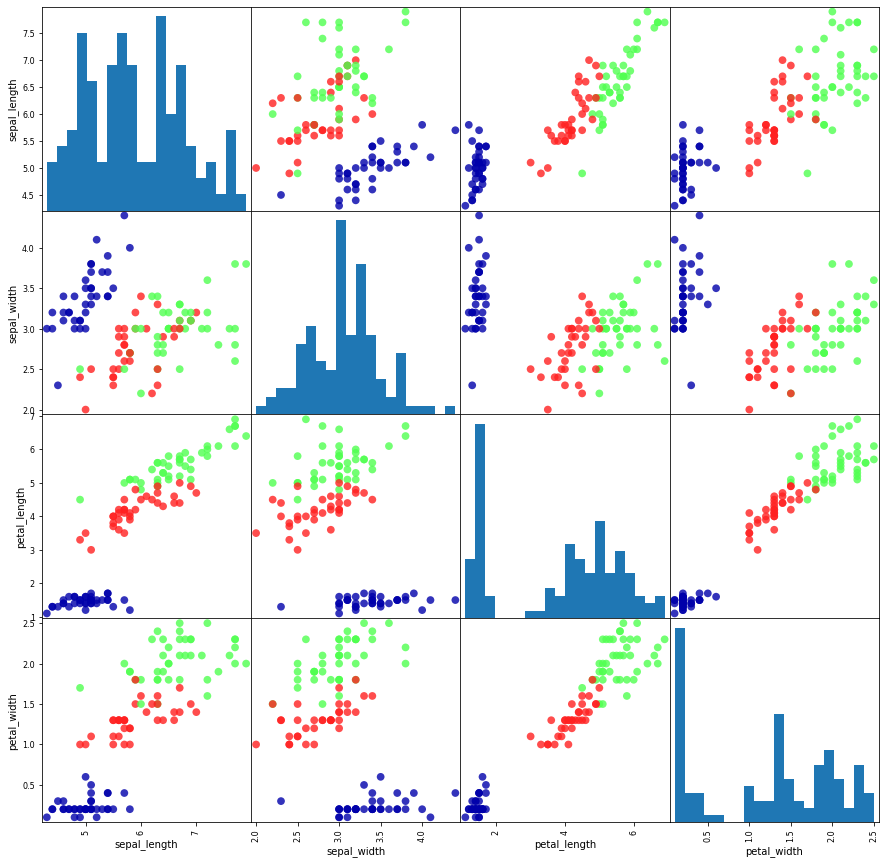

In [31]:
# create a scatter matrix from the dataframe, color by y_train
grr = pd.plotting.scatter_matrix(iris_dataframe,
                        c=y_train,
                        figsize=(15, 15),
                        marker='o',
                        hist_kwds={'bins': 20},
                        s=60,
                        alpha=.8,
                        cmap=mglearn.cm3)

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [33]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [35]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 1,
 'p': 2,
 'weights': 'uniform'}

In [37]:
X_new = np.array([[5, 2.9, 1, 0.2]])

prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(
       iris_dataset['target_names'][prediction]))

Prediction: [0]
Predicted target name: ['setosa']


In [38]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [39]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set score: 0.97


In [40]:
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97


In [44]:
for x,y in zip(y_test, y_pred):
    print(f'original={x}, predicted={y}, {x==y}')

original=2, predicted=2, True
original=1, predicted=1, True
original=0, predicted=0, True
original=2, predicted=2, True
original=0, predicted=0, True
original=2, predicted=2, True
original=0, predicted=0, True
original=1, predicted=1, True
original=1, predicted=1, True
original=1, predicted=1, True
original=2, predicted=2, True
original=1, predicted=1, True
original=1, predicted=1, True
original=1, predicted=1, True
original=1, predicted=1, True
original=0, predicted=0, True
original=1, predicted=1, True
original=1, predicted=1, True
original=0, predicted=0, True
original=0, predicted=0, True
original=2, predicted=2, True
original=1, predicted=1, True
original=0, predicted=0, True
original=0, predicted=0, True
original=2, predicted=2, True
original=0, predicted=0, True
original=0, predicted=0, True
original=1, predicted=1, True
original=1, predicted=1, True
original=0, predicted=0, True
original=2, predicted=2, True
original=1, predicted=1, True
original=0, predicted=0, True
original=2